In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../../new_modules')
import ObsModels

import FSC as controller

# Finite State Controller with $M = 2$, $A = 2$, $Y = 2$

In [3]:
NStepsObs = 100
NTraj = 100
Y = 2
RateMatrixObs = np.ones((Y,Y))
RateMatrixObs = RateMatrixObs + 2*np.eye(Y)

observations = ObsModels.DiscreteMarkovChain(NTraj, NStepsObs, RateMatrixObs, initial_seed = 0)
observations.shape

(100, 100)

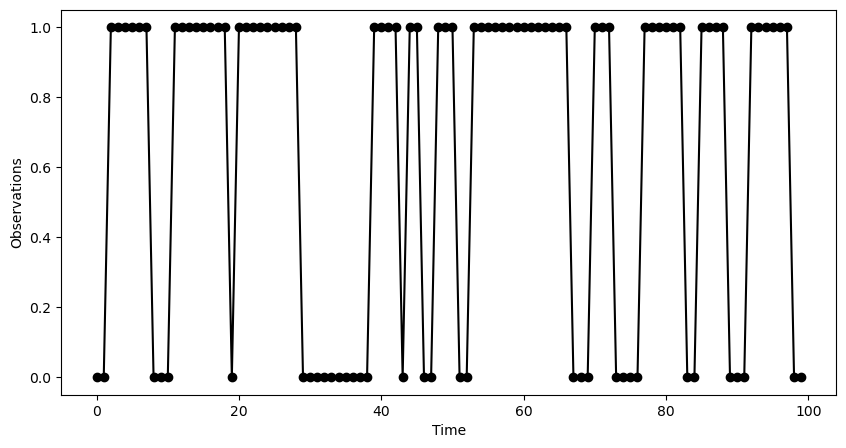

In [4]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

ax.plot(observations[0], 'o', label='Trajectory 0', color='black')
plt.plot(observations[0], color='black', label='Trajectory 0')
ax.set_xlabel('Time')
ax.set_ylabel('Observations')

plt.show()

In [19]:
FSC = controller.FSC("discrete", M = 2, A = 2, Y = Y, mode = "generation", seed = 42)

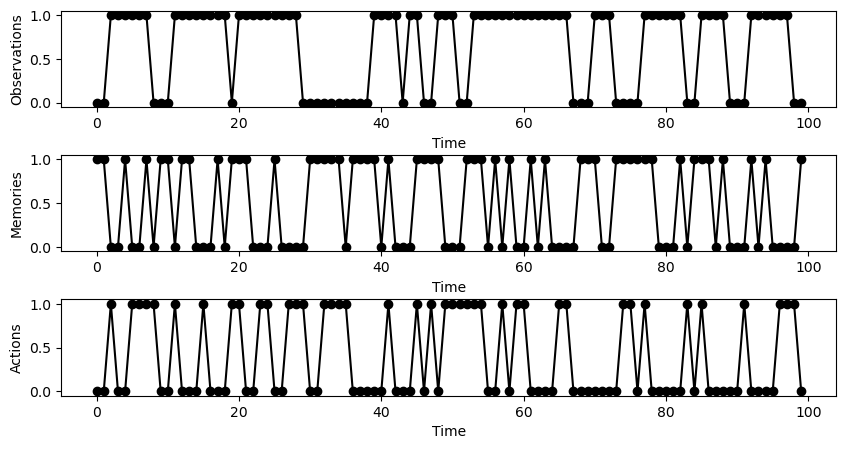

In [20]:
FSC.generator.load_observations(observations)

NSteps = NStepsObs
trajectories = FSC.generator.generate_trajectories(NSteps)

idx_trj = 0
trj = trajectories[idx_trj]
fig, ax = FSC.generator.plot_trajectory(trj)

In [22]:
nLL = 0

for trj in trajectories:
    nLL += FSC.generator.evaluate_nloglikelihood(trj)

nLL/len(trajectories)

68.04064744080655

# Finite State Controller with custom $M = 2$, $A = 2$, $Y = 2$

In [23]:
ObsSpace = np.array(["Obs 0", "Obs 1"])
ActSpace = np.array(["Act 0", "Act 1"])
MemSpace = np.array(["Mem 0", "Mem 1"])

M = len(MemSpace)
A = len(ActSpace)

In [24]:
NStepsObs = 100
NTraj = 100
Y = 2
RateMatrixObs = np.ones((Y,Y))
RateMatrixObs = RateMatrixObs + 2*np.eye(Y)

observations = ObsModels.DiscreteMarkovChain(NTraj, NStepsObs, RateMatrixObs, initial_seed = 0)
# convert observations to strings
observations = [ObsSpace[o] for o in observations]

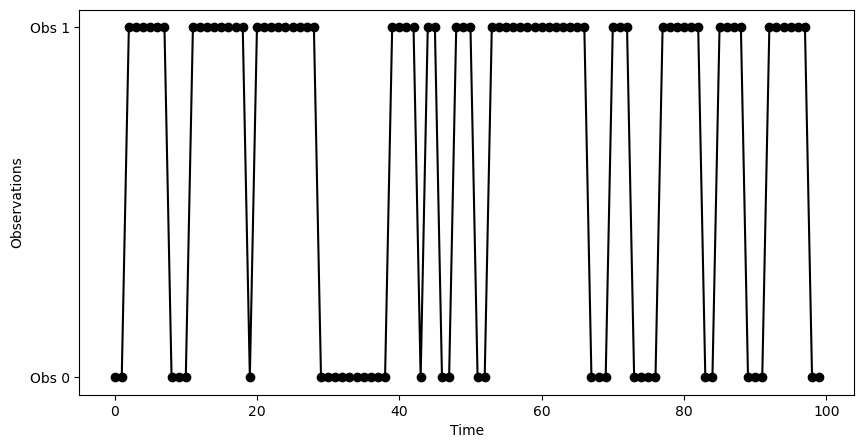

In [25]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

ax.plot(observations[0], 'o', label='Trajectory 0', color='black')
plt.plot(observations[0], color='black', label='Trajectory 0')
ax.set_xlabel('Time')
ax.set_ylabel('Observations')

ax.set_yticks(ObsSpace)

plt.show()

In [26]:
FSC = controller.FSC("discrete", M = M, A = A, Y = Y, mode = "generation",
                     ObsSpace = ObsSpace, ActSpace = ActSpace, MemSpace = MemSpace, seed = 42)

FSC.generator.load_observations(observations)

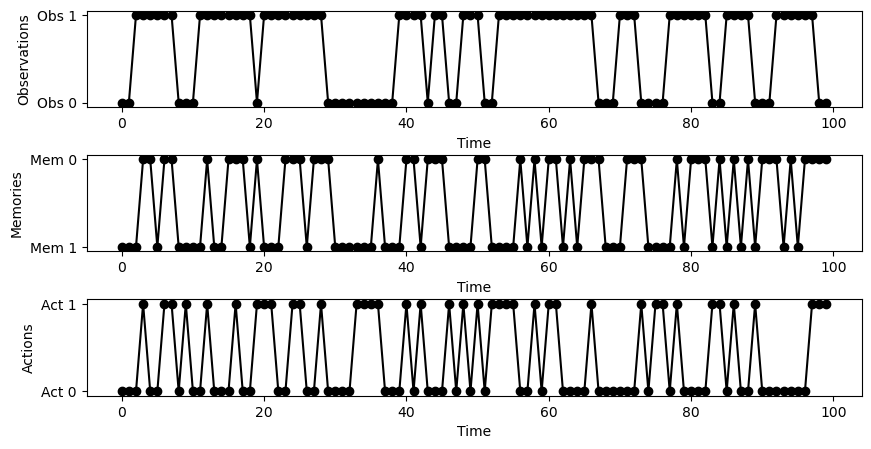

In [27]:
NSteps = NStepsObs
trj = FSC.generator.generate_single_trajectory(NSteps, idx_observation = 0)

fig, ax = FSC.generator.plot_trajectory(trj)

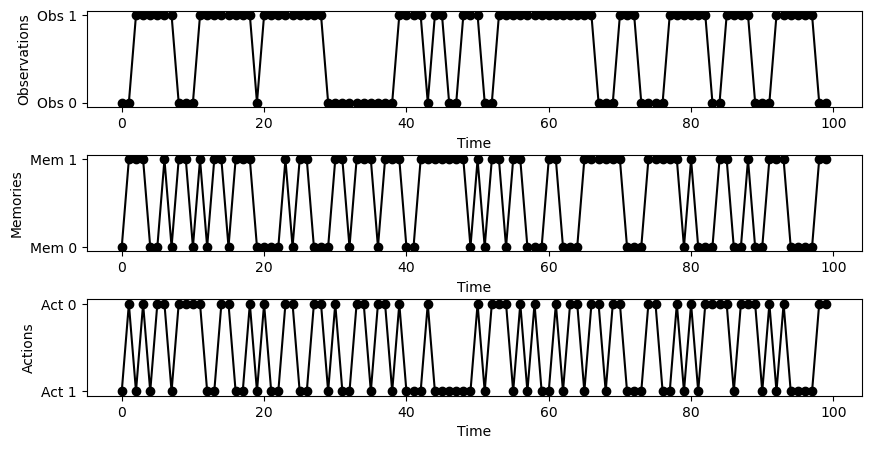

In [28]:
FSC.generator.load_observations(observations)

trajectories = FSC.generator.generate_trajectories(NSteps)

idx_trj = 0
trj = trajectories[idx_trj]
fig, ax = FSC.generator.plot_trajectory(trj)

In [29]:
nLL = 0

for trj in trajectories:
    nLL += FSC.generator.evaluate_nloglikelihood(trj)

nLL/len(trajectories)

67.8178368285298